In [1]:
import os
import numpy as np
from matplotlib import pyplot
from scipy import optimize

In [2]:
data = np.loadtxt(os.path.join('Data','ex2data1.txt'),delimiter=',')

In [3]:
X,y = data[:,0:2],data[:,2]

In [4]:
def plotData(X,y):
    fig = pyplot.figure()
    pos = y==1
    neg = y==0
    pyplot.plot(X[pos,0],X[pos,1],'k*',lw=2,ms=10)
    pyplot.plot(X[neg,0],X[neg,1],'ko',mfc='y',ms='8',mec='k',mew=1)
    

/home/vaibhav/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/vaibhav/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/home/vaibhav/anaconda3/lib/python3.7/site-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'm' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/hom

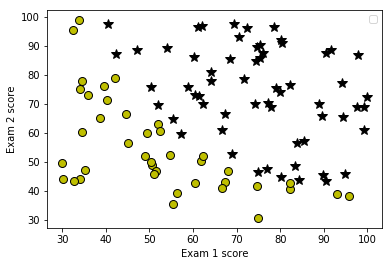

In [5]:
plotData(X,y)
pyplot.xlabel('Exam 1 score')
pyplot.ylabel('Exam 2 score')
pyplot.legend('Admitted','not admitted')
pass

In [6]:
def sigmoid(z):
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1+np.exp(-z))
    return g

In [7]:
z = 0
g = sigmoid(z)
print('g(',z,') = ',g)

g( 0 ) =  0.5


In [8]:
m,n = X.shape
X = np.concatenate([np.ones((m,1)),X],axis=1)

In [9]:
def costFunction(theta,X,y):
    m = y.size
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta.T))
    
    J = (1/m)*np.sum(-y.dot(np.log(h)) - (1-y).dot(np.log(1-h)))
    
    grad = (1/m)*(h-y).dot(X)
    
    return J,grad


In [10]:
initial_theta = np.zeros(n+1)
cost, grad = costFunction(initial_theta,X,y)
print('Cost at initial theta {:.3f}'.format(cost))

test_theta = np.array([-24,0.2,0.2])
cost, grad = costFunction(test_theta,X,y)

print('Cost at test theta: {:.3f}'.format(cost))

Cost at initial theta 0.693
Cost at test theta: 0.218


In [11]:
options = {'maxiter':400}
res = optimize.minimize(costFunction,
                       initial_theta,
                       (X,y),
                       jac=True,
                       method='TNC',
                       options=options)
cost = res.fun
theta = res.x
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))

Cost at theta found by optimize.minimize: 0.203
	[-25.161, 0.206, 0.201]


In [12]:
def predict(theta,X):
    m = X.shape[0]
    p = np.zeros(m)
    p = np.round(sigmoid(X.dot(theta.T)))
    return p


In [13]:
data2 = np.loadtxt(os.path.join('Data','ex2data2.txt'),delimiter=',') 
X = data2[:,:2]
y = data2[:,2]

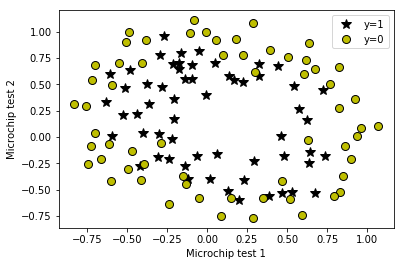

In [14]:
plotData(X,y)
pyplot.xlabel('Microchip test 1')
pyplot.ylabel('Microchip test 2')
pyplot.legend(['y=1','y=0'],loc='upper right')
pass

In [16]:
import utils

In [17]:
X = utils.mapFeature(X[:,0],X[:,1])

In [18]:
def costFunctionReg(theta,X,y,lambda_):
    m = y.size
    J = 0
    grad = np.zeros(theta.shape)
    h = sigmoid(X.dot(theta.T))
    temp = theta
    temp[0] = 0
    J = (1/m)*np.sum(-y.dot(np.log(h))-(1-y).dot(np.log(1-h)))+(lambda_ / (2*m))*np.sum(np.square(temp))
    
    grad = (1/m)*(h-y).dot(X)
    grad = grad + (lambda_ /m)*temp
    
    return J,grad

In [20]:
initial_theta = np.zeros(X.shape[1])
lambda_ = 1
cost, grad = costFunctionReg(initial_theta,X,y,lambda_)
print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))


Cost at initial theta (zeros): 0.693
Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]


In [21]:
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

------------------------------

Cost at test theta    : 3.16
Expected cost (approx): 3.16

Gradient at initial theta (zeros) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


Text(0.5, 0, 'Microchip Test 1')

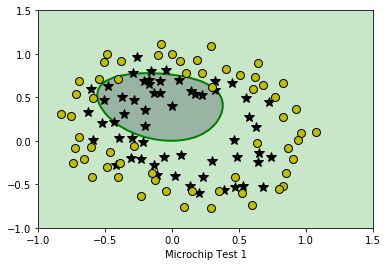

In [22]:
initial_theta = np.zeros(X.shape[1])
lambda_ = 1.00

options = {'maxiter':100}
res = optimize.minimize(costFunctionReg,
                       initial_theta,
                       (X,y,lambda_),
                       jac=True,
                       method='TNC',
                       options = options)

cost = res.fun

theta = res.x

utils.plotDecisionBoundary(plotData,theta,X,y)
pyplot.xlabel('Microchip Test 1')
